Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introdução à Teoria de Vibrações

Trabalho 2.2

Nome: Fernanda Petry Pes  
Matrícula: 00312240  


In [1]:
# Importar as bibliotecas necessárias para esse trabalho

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sc


## 1. Introdução 

O presente trabalho tem como objetivos propor uma estrutura que possua uma dimensão predominante sobre as outras, gerar a matriz de massa e a matriz de flexibilidade da estrutura, obter as menores vibrações e um esboço modal.
Em uma segunda etapa, obter a resposta do sistema à uma velocidade inicial e calcular a matriz de amortecimento.

Portanto, a estrutura escolhida foi modelada no Ftool e corresponde a uma treliça plana, conforme a figura a seguir:

<img src="imagens/estrutura.jpg" alt="Treliça" width="780px"/>

A treliça possui 21 metros e esta discretizada em 12 módulos. 


## 2. Matriz de rigidez

Inicialmente, deve-se montar a matriz de flexibilidade H para então obter-se a matriz de rigidez. No Ftool, aplica-se carregamentos unitários em cada nó livre da estrutura e assim, os deslocamentos gerados a cada carregamento, corresponderão a uma coluna da matriz de flexibilidade. Como são 11 nós livres, a matriz de flexibilidade será de ordem 11.


In [2]:
# Matriz de flexibilidade m/N
H1 = np.array([[4.834, 6.871, 8.200, 8.891, 9.015, 8.679, 7.917, 6.766, 5.331, 3.684, 1.895], 
               [6.871, 12.68, 15.44, 16.93, 17.29, 16.72, 15.30, 13.11, 10.34, 7.156, 3.684], 
               [8.200, 15.44, 21.41, 23.84, 24.57, 23.91, 21.98, 18.88, 14.93, 10.34, 5.331], 
               [8.891, 16.93, 23.84, 29.04, 30.36, 29.83, 27.59, 23.80, 18.88, 13.11, 6.766], 
               [9.015, 17.29, 24.57, 30.36, 34.16, 34.04, 31.79, 27.59, 21.98, 15.30, 7.917],
               [8.679, 16.72, 23.91, 29.83, 34.04, 36.34, 34.04, 29.83, 23.91, 16.72, 8.679],
               [7.917, 15.30, 21.98, 27.59, 31.79, 34.04, 34.16, 30.36, 24.57, 17.29, 9.015],
               [6.766, 13.11, 18.88, 23.80, 27.59, 29.83, 30.36, 29.04, 23.84, 16.93, 8.891],
               [5.331, 10.34, 14.93, 18.88, 21.98, 23.91, 24.57, 23.84, 21.41, 15.44, 8.200],
               [3.684, 7.156, 10.34, 13.11, 15.30, 16.72, 17.29, 16.93, 15.44, 12.68, 6.871],
               [1.895, 3.684, 5.331, 6.766, 7.917, 8.679, 9.015, 8.891, 8.200, 6.871, 4.834]])*1e-8



Assim, como a matriz de flexibilidade é igual ao inverso da matriz de rigidez:

$$\mathbf{H}^{-1} = \mathbf{K}$$ 


In [3]:
# Matriz de rigidez em N/m
K1 = np.linalg.inv(H1) 


## 3. Matriz de massa concentrada

A matriz de massa é caracterizada como uma matriz diagonal, onde suas componentes são calculadas a partir da área de influência dos nós da estrutura. Foi estimado o valor de 2000 Kg/m para a massa distribuída das barras. As massas estão discretizadas em 12 módulos de 1,75m. Assim, o valor associado por nó ficará em torno de 3500 Kg.

In [4]:
# Lumped mass matrix in kg
M1 = np.array([[3.5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,], 
               [0,  3.5,  0,  0,  0,  0,  0,  0,  0,  0,  0,], 
               [0,  0,  3.5,  0,  0,  0,  0,  0,  0,  0,  0,], 
               [0,  0,  0,  3.5,  0,  0,  0,  0,  0,  0,  0,],
               [0,  0,  0,  0,  3.5,  0,  0,  0,  0,  0,  0,],
               [0,  0,  0,  0,  0,  3.5,  0,  0,  0,  0,  0,],
               [0,  0,  0,  0,  0,  0,  3.5,  0,  0,  0,  0,],
               [0,  0,  0,  0,  0,  0,  0,  3.5,  0,  0,  0,],
               [0,  0,  0,  0,  0,  0,  0,  0,  3.5,  0,  0,],
               [0,  0,  0,  0,  0,  0,  0,  0,  0,  3.5,  0,],
               [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3.5,]])*1e3 


## 4. Frequência natural e modos de vibração

É possível obter as frequências naturais de vibração da estrutura e seus modos de vibração através das matrizes de rigidez e de massa, do cálculo de problemas de autovalores e autovetores.


In [5]:
# Cálculo dos autovalores e autovetores 
w21, Phi1 = sc.eig(K1, M1)

# Colocando os autovalores em ordem
iw   = w21.argsort()
w21  = w21[iw]
Phi1 = Phi1[:,iw]

# Cálculo das frequencias naturais
wk1  = np.sqrt(np.real(w21)) 
fk1  = wk1/2/np.pi


Plotando as quatro primeira frequências naturais e modos de vibração:

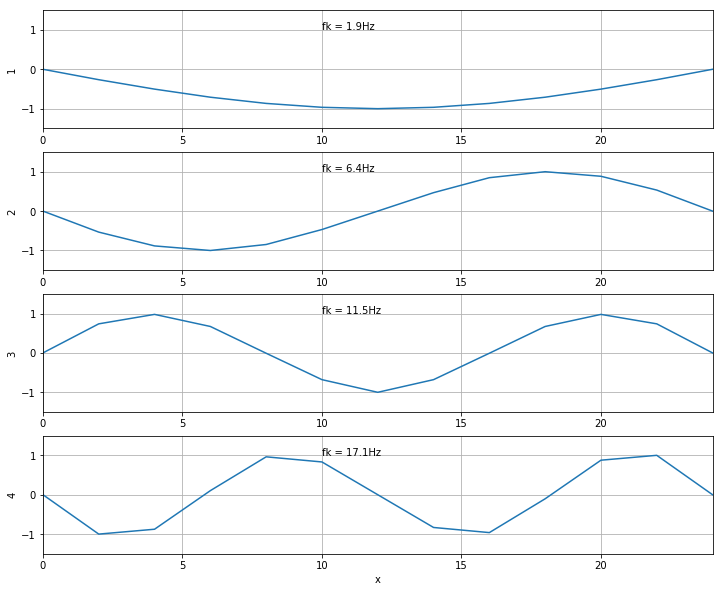

In [6]:
plt.figure(1, figsize=(12,10))
x = np.arange(0, 26, 2)

for k in range(4):
    pk = np.zeros(13) 
    pk[1:-1] = Phi1[:,k]
    pk /= np.max(np.abs(pk))   # ajuste da escala para amplitude unitária
    
    plt.subplot(4,1,k+1) 
    plt.plot(x, pk)
    
    plt.xlim( 0.0, 24.0);
    plt.ylim(-1.5,  1.5);  plt.ylabel(str(k+1));
    plt.text(10, 1, 'fk = {0:3.1f}Hz'.format(fk1[k]));
    plt.grid(True)
    
plt.xlabel('x');



## 5. Resposta do sistema à uma velocidade inicial

Neste caso, aplica-se um vetor de velocidade inicial no grau de liberdade central, onde considera-se um impulso conforme o método de resposta impulsiva. Assim, aplica-se uma força de 45 kN que atua em um determinado intervalo (td). 


In [7]:
fmax = np.max(fk1)
print(fmax)
Fa = 45000   # força aplicada
Tn = 1/fmax  # menor período relacionado as frequências naturais
td = Tn/4
m = 2500
vo = Fa*td/m
print(vo)

vo_v=[0, 0, 0, 0, 0, vo, 0, 0, 0, 0, 0] 

uo_v = np.zeros(11) 



38.502706952877006
0.11687489935467381


Pode-se calcular a resposta em deslocamento formada pelas expressões abaixo, onde as incógnitas são os ângulos de fase e as amplitudes para os nós.

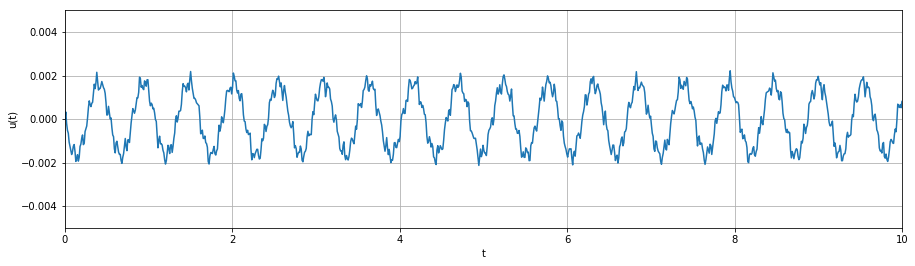

In [8]:
Phit = Phi1
for k in range(10): 
    Phit[k] = Phi1[k].transpose()  #calculo das transpostas dos autovalores
    

xi = np.pi/2
UMAX = np.zeros(11) 

for k in range(11): 
    Mi=np.dot(np.dot(Phit[k],M1), Phi1[k])
    umax = (np.dot(np.dot(Phit[k], M1),vo_v)) /  (wk1[k] * np.sin(xi)* Mi)
    
    UMAX[k]=umax
    
    
t = np.linspace(0,10,1000)  # vetor tempo
uk = np.zeros((11,1000))    # matriz deslocamentos 

for k in range(11): 
    uk[k,:] = UMAX[k]*np.cos(-wk1[k]*t - np.pi/2)
    

u = np.dot(Phi1, uk)   #autovalores

plt.figure(2, figsize=(15,4))
plt.plot(t,u[5,:]) 
plt.xlim(0.0, 10.0); plt.xlabel("t");
plt.ylim(-0.005, 0.005); plt.ylabel("u(t)");
plt.grid(True)



## 6. Amortecimento

Calcula-se o amortecimento através da matriz de Rayleigh.



In [9]:
zeta = np.zeros(11) 
zeta[0] = 0.01
zeta[1] = 0.01
alfa1 = 2*(zeta[0]*wk1[0]-zeta[1]*wk1[1])/(wk1[0]**2-wk1[1]**2)
alfa0 = 2*zeta[0]*wk1[0]-alfa1*wk1[1]**2

for k in range (9): 
    zeta[k+2] = (alfa0/(2*wk1[k+2]))+(alfa1*wk1[k+2]/2)
    
print(zeta)




[0.01       0.01       0.01131643 0.01902151 0.02465118 0.03134379
 0.03485714 0.04024637 0.04162545 0.04582697 0.04608859]
